# **Azure api, Face recognition**

In [1]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO #import packages needed

In [2]:
# Key and endpoint for api use

sub_key = 'key value'
faceApi_url = 'endpoint' + '/face/v1.0/detect' #can get at Azure portal

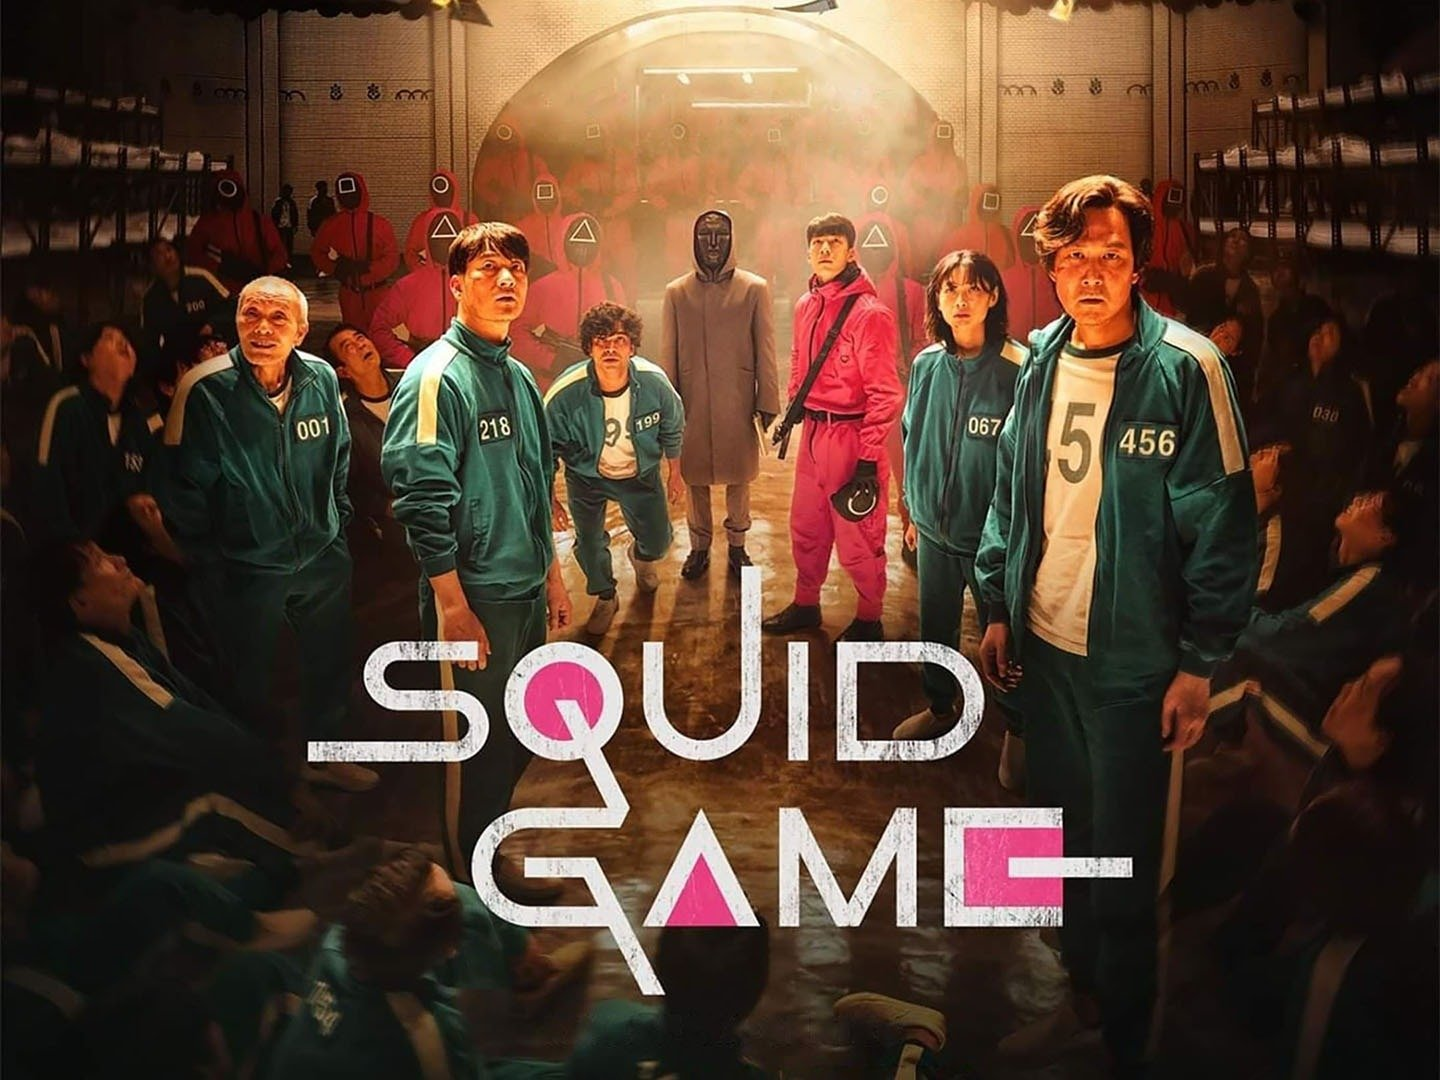

In [4]:
# Prepare image

image_url = 'https://flxt.tmsimg.com/assets/p20492187_b_h9_bf.jpg'
image = Image.open(BytesIO(requests.get(image_url).content))

image

In [5]:
# Set headers
headers = {'Ocp-Apim-Subscription-Key':sub_key}
params = {
    'returnFaceId': 'false',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes':'Smile'
}
data = {'url':image_url}

In [6]:
# Get detected data use api

response = requests.post(faceApi_url, params=params, headers=headers, json=data)
faces = response.json()
faces

[{'faceRectangle': {'top': 233, 'left': 1047, 'width': 92, 'height': 92},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 250, 'left': 471, 'width': 65, 'height': 65},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 299, 'left': 233, 'width': 61, 'height': 61},
  'faceAttributes': {'smile': 0.433}},
 {'faceRectangle': {'top': 275, 'left': 934, 'width': 53, 'height': 53},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 327, 'left': 589, 'width': 44, 'height': 44},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 230, 'left': 805, 'width': 41, 'height': 41},
  'faceAttributes': {'smile': 0.0}}]

In [7]:
# Draw box

draw = ImageDraw.Draw(image) #open img for draw

def DrawBox(faces):
  for face in faces:
    # print(face)'

    rect = face['faceRectangle']
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']

    draw.rectangle(((left,top),(left+width,top+height)),outline='white')

    face_attributes = face['faceAttributes']
    smile = face_attributes['smile']
    
    draw.text((left,top),str(smile),fill='white')

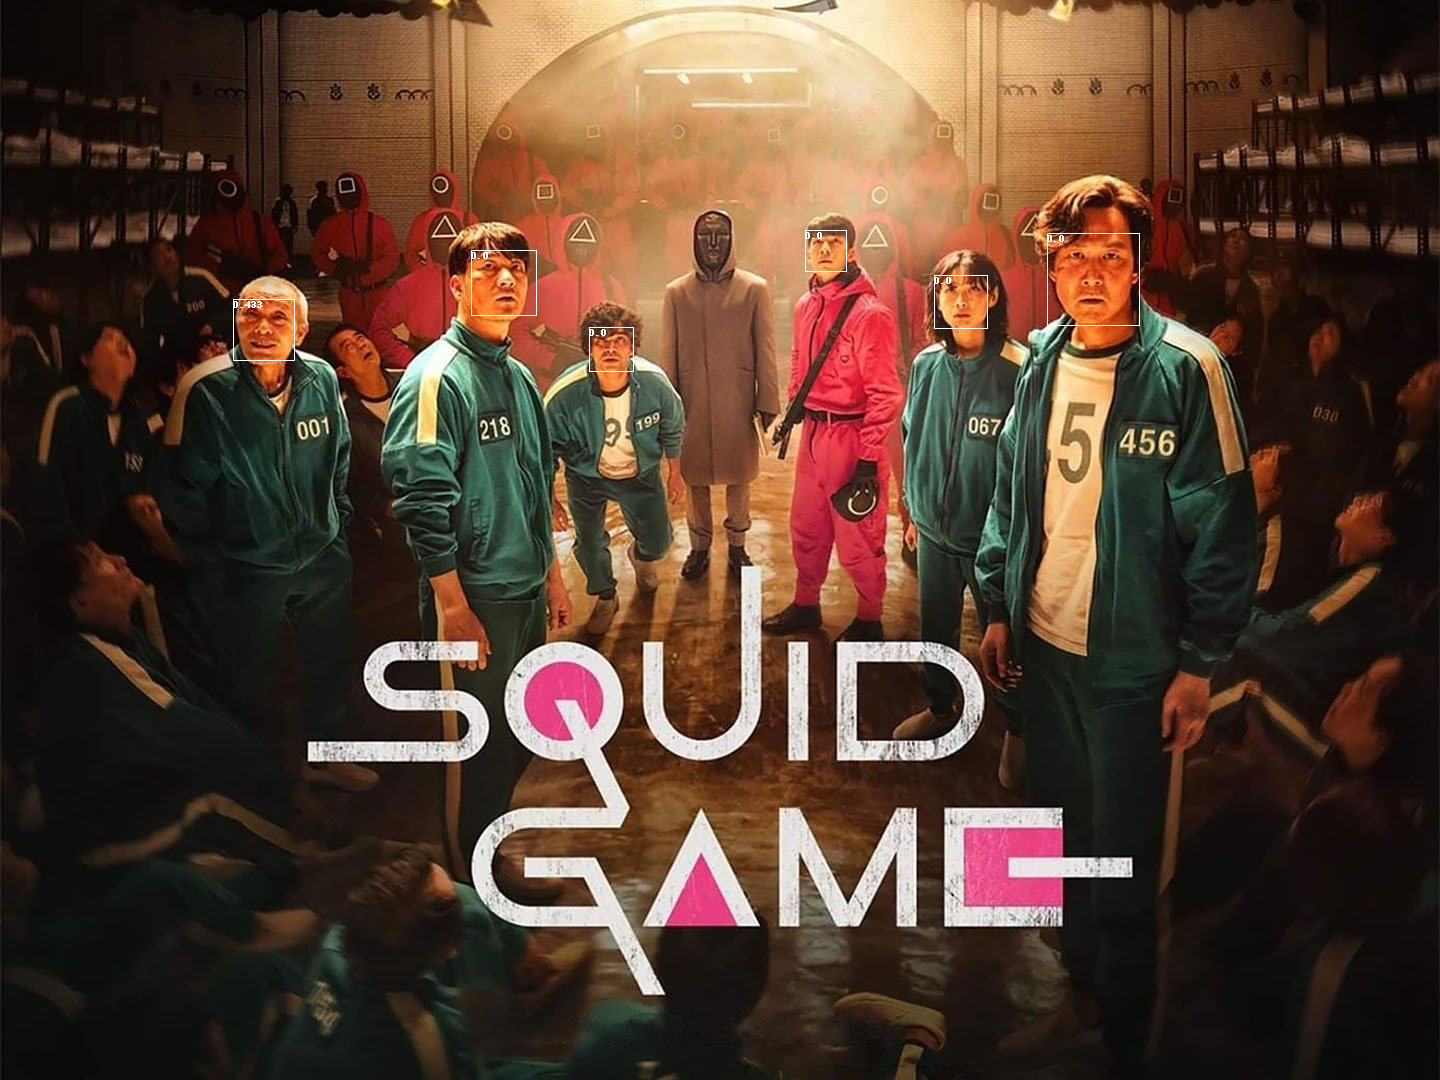

In [8]:
DrawBox(faces)
image